# The Movie DB
In a world… where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."
## Introduction
In this notebook we will analyze a dataset containing 3000 movies with their characteristics and their box office revenue. We aim at predicting the box office revenue of never seen movies and for  doing this we will use *regression* since it is known to be employed in prediction applications (such as prediction of stock market indices). Also *classification* is used for prediction, but it tries to predict categorical values, while we have to deal with revenue, which is a continuous value, hence regression is used.

In the first part of this notebook we will look at the dataset and try to clean some missing values ant to format some values in order to use them later.
## Data preprocessing
The overall dataset contains over 7000 movies, but 3000 of them are suitable for training since the the `revenue` attribute is included.  
Let's have a look to the train dataset:

In [1]:
import pandas as pd
import json
import ast    #Abstract Syntax Tree
import itertools
import numpy as np 
from matplotlib import pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

sns.set()
pd.set_option('display.max_columns', None)


In [2]:
train_set = pd.read_csv('tmdb-box-office-prediction/train.csv')
test_set = pd.read_csv('tmdb-box-office-prediction/test.csv')
train_set.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

As we can see from the tables above, the available information are:
- `id`: A unique identifier, not so useful for prediction;
- `belongs to collection`: Tells to which collection the movie belongs to, if any;
- `budget`: The budget needed for producing the movie;
- `genres`: Genres list to which the movie belongs;
- `homepage`: The URL of the movie's homepage, if any;
- `imdb_id`: A unique identifier represented as a string;
- `original_language`: The movie's original language;
- `original_title`: The movie's original title (in its original language);
- `overview`: A text that describe, in broad terms, the movie;
- `popularity`: A numerical value representing popularity;
- `poster_path`: An URI that indetifies the movie's poster;
- `production_companies`: The companies involved in the production;
- `production_countries`: The countries in which the movie is produced;
- `release_date`: Month/day/year on which the movie was released;
- `runtime`: The duration (in minutes) of the movie;
- `spoken_languages`: The languages spoken in the movie;
- `status`: If the movie is yet released or not;
- `tagline`: The tagline of the movie, if any;
- `title`: The title of the movie in english;
- `Keywords`: The keywords of the movie;
- `cast`: The actors involved in the movie;
- `crew`: The directors and other people employed in the making of the movie;
- `revenue`: The movie's box office revenue.


In [4]:
for date,title,index in zip (test_set['release_date'], test_set['title'], enumerate(test_set['release_date'])):
    if not type(date) == str:
        print(title, index)

Jails, Hospitals & Hip-Hop (828, nan)


In [5]:
test_set['release_date'][828] = '05/01/00'

<ipython-input-5-ea3b8ac845d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['release_date'][828] = '05/01/00'


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

From the above result we can see that we don't have to deal with many missing values. In the dataset there are a lot of null values for attributes `belongs_to_collection` and `homepage` but just because a movie may or may not have that "feature" so there isn't lack of information. Plus, the `revenue` attribute has 3000 non-null values (3000 is also the dataset cardinality) and since it is the most important value for our goal we can keep all the rows.

In [7]:
train_set['runtime'] = train_set['runtime'].fillna(train_set['runtime'].mean())
test_set['runtime'] = test_set['runtime'].fillna(test_set['runtime'].mean())
#Fill null value for the runtime attribute

We can also note that there are some columns that are formatted almost as JSON documents. In particular, the columns  are formatted exactly as Python's *list* of *dictionaries*. The considered columns are: 
- `belongs_to_collection`
- `genres` 
- `production_companies`
-`production_countries`
-`spoken_languages`
-`Keywords`
-`cast`
-`crew`.    
We can extract important values from those data, ignoring useless values (e.g. `id`).

In [8]:
json_columns = ['belongs_to_collection', 
                'genres', 
                'production_companies', 
                'production_countries', 
                'spoken_languages', 
                'Keywords', 
                'cast', 
                'crew']


def string_to_tree(df):   #We will infact use the ast module to parse the string as python understandable code
    for column in json_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df


train_set = string_to_tree(train_set)
test_set = string_to_tree(test_set)

#DIRECTORS = set()
directors = train_set['crew'].apply(lambda x: [i['name'] for i in x if ('job' in i and (i['job'] == 'Director'))] if x!={} else [])
directors = directors.rename('directors')
train_set = train_set.join(directors)


for column in json_columns:
    train_set[column] = train_set[column].apply(lambda x: [i['name'] for i in x] if x!={} else [])
    test_set[column] = test_set[column].apply(lambda x: [i['name'] for i in x] if x!={} else [])

train_set.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,directors
0,1,[Hot Tub Time Machine Collection],14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,[Steve Pink]
1,2,[The Princess Diaries Collection],40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,[Garry Marshall]
2,3,[],3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,[Damien Chazelle]
3,4,[],1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/12,122.0,"[English, हिन्दी]",Released,NaN,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,[Sujoy Ghosh]
4,5,[],0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/09,118.0,[한국어/조선말],Released,NaN,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,[Jong-seok Yoon]


In [9]:
train_set['belongs_to_collection'] = [1 if (not x == []) else 0 for x in train_set['belongs_to_collection']]
train_set['homepage'] = [1 if (type(x) == str) else 0 for x in train_set['homepage']]

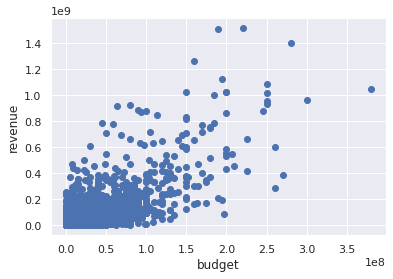

In [10]:
# Let's plot the data now
x = train_set['budget']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("budget")
plt.ylabel("revenue")
plt.show()

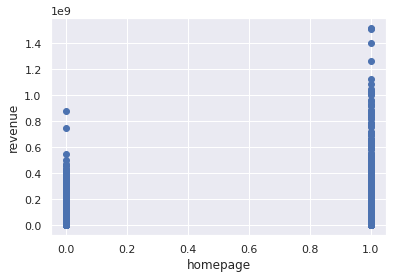

In [11]:
# Let's plot the data now
x = train_set['homepage']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("homepage")
plt.ylabel("revenue")
plt.show()

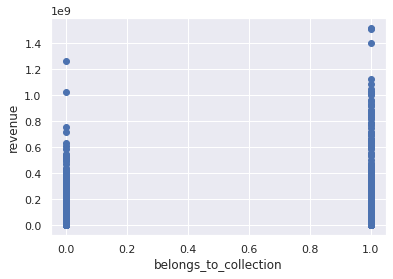

In [12]:
# Let's plot the data now
x = train_set['belongs_to_collection']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("belongs_to_collection")
plt.ylabel("revenue")
plt.show()

In [13]:
train_set['tagline']=[1 if type(status) == str else 0 for status in train_set['tagline']]

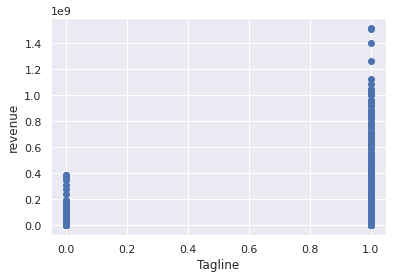

In [14]:
# Let's plot the data now
x = train_set['tagline']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("Tagline")
plt.ylabel("revenue")
plt.show()

In [15]:
def format_date(df=train_set):
    df['year'] = [0 for x in df['release_date']]
    df['month'] = [0 for x in df['release_date']]
    df['day'] = [0 for x in df['release_date']]
    c = 0
    for date in df['release_date']:
        if (type(date) == str):
            m_d_y = date.split('/')
            if int(m_d_y[2])<21:
                m_d_y[2] = '20' + m_d_y[2]
            else:
                m_d_y[2] = '19' + m_d_y[2]
            #if len(m_d_y[0]) < 2:
            #    m_d_y[0] = '0' + m_d_y[0]
            #if len(m_d_y[1]) < 2:
            #    m_d_y[1] = '0' + m_d_y[1]
            #y_m_d = m_d_y[2] + m_d_y [0] + m_d_y[1] TODO rimuovi
            df['year'][c] = int(m_d_y[2])
            df['month'][c] = int(m_d_y[0])
            df['day'][c] = int(m_d_y[1])
        c += 1

In [16]:
format_date(train_set)
test_set['release_date'].fillna("01/01/00")
format_date(test_set)
train_set[['year','month','day']].head()

<ipython-input-15-81f78de77fe1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'][c] = int(m_d_y[2])
<ipython-input-15-81f78de77fe1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][c] = int(m_d_y[0])
<ipython-input-15-81f78de77fe1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][c] = int(m_d_y[1])


,year,month,day
0,2015,2,20
1,2004,8,6
2,2014,10,10
3,2012,3,9
4,2009,2,5


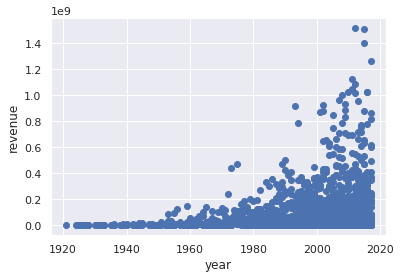

In [17]:
# Let's plot the data now
x = train_set['year']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("year")
plt.ylabel("revenue")
plt.show()

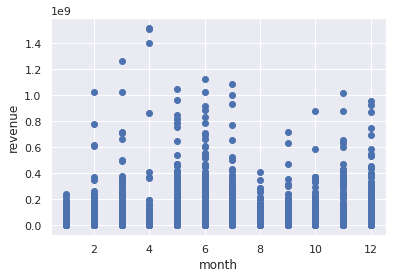

In [18]:
# Let's plot the data now
x = train_set['month']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("month")
plt.ylabel("revenue")
plt.show()

In [19]:
quarter = pd.Series()
quarter = quarter.append(pd.Series([int(q/4)+1 for q in train_set['month']]))
train_set = train_set.join(quarter.rename('quarter'))
train_set['quarter'].head()

<ipython-input-19-ec98cd727ebf>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  quarter = pd.Series()


0    1
1    3
2    3
3    1
4    1
Name: quarter, dtype: int64

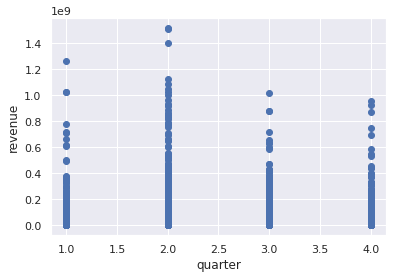

In [20]:
# Let's plot the data now
x = train_set['quarter']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("quarter")
plt.ylabel("revenue")
plt.show()

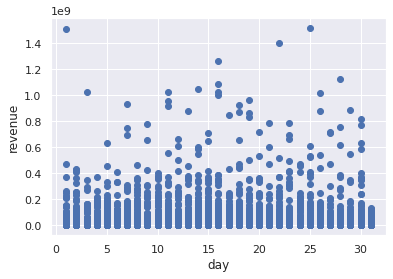

In [21]:
# Let's plot the data now
x = train_set['day']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("day")
plt.ylabel("revenue")
plt.show()

In [22]:

def add_columns(SET, column, df=train_set):
    for elem in SET:
        df[elem] = [1 if (elem in x) else 0 for x in df[column]] 

def series_to_set(column, source_df = train_set):
    SET = set()
    for each_list in source_df[column]:
        for elem in each_list:
            SET.add(elem)
    return SET

def series_of_lists_to_columns(column, source_df = train_set):
    SET = series_to_set(column, source_df)
        

    add_columns(SET, column)
    
    return SET


def get_most_common(SET, column, cardinality=-1, source_df=train_set):
    df = pd.DataFrame(index=SET)
    df['occurences'] = [0 for x in enumerate(SET)]
    for x in source_df[column]:
        for elem in x:
            df.loc[elem]['occurences'] += 1
    commons = df.sort_values('occurences', ascending=False)[:cardinality].index
    return commons

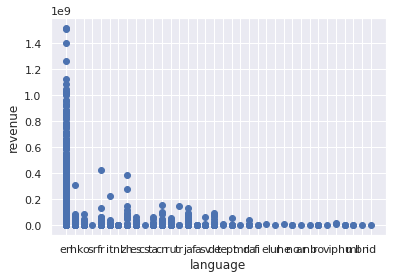

In [23]:
# Let's plot the data now
x = train_set['original_language']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("language")
plt.ylabel("revenue")
plt.show()

In [24]:
GENRES = series_of_lists_to_columns('genres')

In [25]:
LANGUAGES = series_of_lists_to_columns('spoken_languages')

In [203]:
PROD_COUNTRIES = series_to_set('production_countries')
PROD_COUNTRIES = get_most_common(PROD_COUNTRIES, 'production_countries')
add_columns(PROD_COUNTRIES, 'production_countries')
PROD_COMPANIES = series_to_set('production_companies')
PROD_COMPANIES = get_most_common(PROD_COMPANIES, 'production_companies', 500)
add_columns(PROD_COMPANIES, 'production_companies')
sorted_data = train_set.sort_values('revenue', ascending=False)
profitable_movies = sorted_data[:200]
DIRECTORS = series_to_set('directors')
DIRECTORS = get_most_common(DIRECTORS, 'directors', 500)
DIRECTORS = DIRECTORS.union(series_to_set('directors', source_df=profitable_movies))
#add_columns(DIRECTORS, 'directors')

train_set['has_famous_director'] = [1 if len(DIRECTORS.intersection(directors)) else 0 for directors in train_set['crew']]

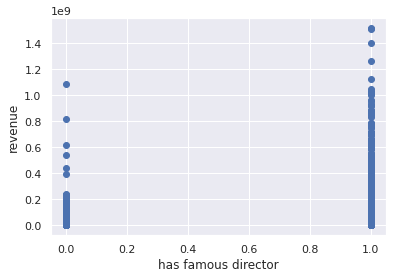

In [204]:
# Let's plot the data now
x = train_set['has_famous_director']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("has famous director")
plt.ylabel("revenue")
plt.show()

In [256]:
KEYWORDS = series_to_set('Keywords')
key_df = pd.DataFrame(index=KEYWORDS)
key_df['occurences'] = [0 for x in enumerate(KEYWORDS)]
for keys in train_set['Keywords']:
    for key in keys:
        key_df.loc[key]['occurences'] += 1
KEYWORDS = key_df.sort_values('occurences', ascending=False)[:400].index

#add_columns(KEYWORDS, 'Keywords')

In [188]:
CAST = series_to_set('cast')
cast = set()
for country in PROD_COUNTRIES:
    df = train_set[['cast', country]]
    c = 0
    for e in train_set[country]:
        if (e != 1):
            df = df.drop(c)
        c += 1
    cast = cast.union(get_most_common(CAST, 'cast', int(800*(len(df[country])/3000)), df))

sorted_data = train_set.sort_values('revenue', ascending=False)
profitable_movies = sorted_data[:100]
cast = cast.union(series_to_set('cast', source_df=profitable_movies))

CAST = cast
#add_columns(CAST, 'cast')
train_set['famous_actors'] = [len(CAST.intersection(actors)) for actors in train_set['cast']]

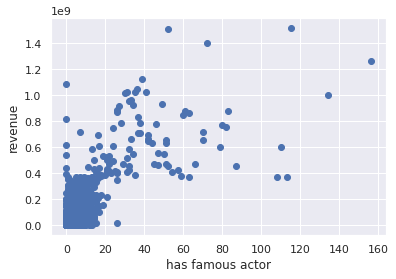

In [50]:
# Let's plot the data now
x = train_set['famous_actors']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("has famous actor")
plt.ylabel("revenue")
plt.show()

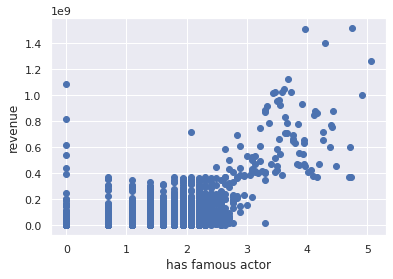

In [141]:
train_set['log_famous_actors'] = np.log1p(train_set['famous_actors'])
# Let's plot the data now
x = train_set['log_famous_actors']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("has famous actor")
plt.ylabel("revenue")
plt.show()

In [144]:
#np.log1p([15])

array([2.77258872])

In [175]:
#train_set['famous_actors'] = [1 if n_act in range(1,15) else 15 if n_act >= 15 else 0 for n_act in train_set['famous_actors'] ]

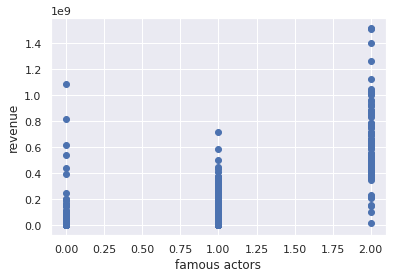

In [146]:
# Let's plot the data now
x = train_set['famous_actors']
#x = [len(train_set['keywords'][i]) for i in range(len(train_set['keywords']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("famous actors")
plt.ylabel("revenue")
plt.show()

In [30]:
add_columns(GENRES, 'genres', df=test_set)
add_columns(LANGUAGES, 'spoken_languages', df=test_set)
add_columns(PROD_COMPANIES, 'production_companies', df=test_set)
add_columns(PROD_COUNTRIES, 'production_countries', df=test_set)
#add_columns(DIRECTORS, 'directors', df=test_set)
add_columns(KEYWORDS, 'Keywords', df=test_set)
add_columns(CAST, 'cast', df=test_set)

test_set['belongs_to_collection'] = [1 if (not x == []) else 0 for x in test_set['belongs_to_collection']]
test_set['homepage'] = [1 if (type(x) == str) else 0 for x in test_set['homepage']]
test_set['n_genres'] = [len(test_set['genres'][i]) for i in range(len(test_set['genres']))]
test_set['tagline']=[1 if type(status) == str else 0 for status in test_set['tagline']]
test_set['n_genres'] = [len(test_set['genres'][i]) for i in range(len(test_set['genres']))]

quarter = pd.Series()
quarter = quarter.append(pd.Series([int(q/4)+1 for q in test_set['month']]))
test_set = test_set.join(quarter.rename('quarter'))

<ipython-input-30-da73406b50f8>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  quarter = pd.Series()


In [33]:
train_set['n_genres'] = [len(train_set['genres'][i]) for i in range(len(train_set['genres']))]

<AxesSubplot:xlabel='revenue'>

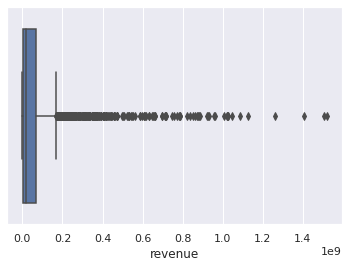

In [32]:
sns.boxplot(x=train_set['revenue'])

In [34]:
factor = 5
upper_lim = train_set['revenue'].mean () + train_set['revenue'].std () * factor
lower_lim = train_set['revenue'].mean () - train_set['revenue'].std () * factor
print("upper_lim:", upper_lim)
print("lower_lim:", lower_lim)

upper_lim: 754387483.5687587
lower_lim: -620935779.7914255


In [79]:
train_set['log_revenue'] = np.log1p(train_set['revenue'])

In [100]:
factor = 2
log_upper_lim = train_set['log_revenue'].mean () + train_set['log_revenue'].std () * factor
log_lower_lim = train_set['log_revenue'].mean () - train_set['log_revenue'].std () * factor
print("log upper_lim:", log_upper_lim)
print("log lower_lim:", log_lower_lim)

log upper_lim: 22.084608014290552
log lower_lim: 9.839364135251127


<AxesSubplot:xlabel='log_revenue'>

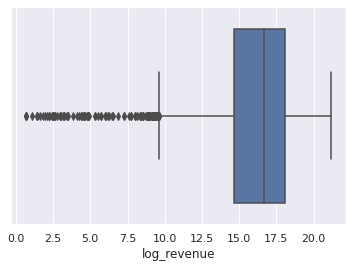

In [35]:
sns.boxplot(x=train_set['log_revenue'])

In [36]:
train_set['log_budget'] = np.log1p(train_set['budget'])

In [230]:
features = [genre for genre in GENRES]
features.extend(['n_genres', 'runtime', 'popularity', 'belongs_to_collection', 'year', 'quarter', 'homepage', 'budget', 'tagline'])
features.extend([country for country in PROD_COUNTRIES])
features.extend([company for company in PROD_COMPANIES])
features.extend(['famous_actors', 'has_famous_director'])
#features.extend([actor for actor in CAST])
#features.extend([director for director in DIRECTORS])
#features.extend([keyword for keyword in KEYWORDS])
features.extend([lang for lang in LANGUAGES])
X = train_set[features][:2500]
y = [train_set['revenue'][c] for c in range(2500) if train_set['revenue'][c] <= upper_lim and train_set['log_revenue'][c] >= log_lower_lim]#train_set['revenue'][:2500]

#for feature in features:
#    MAX = train_set[feature].max()
#    MIN = train_set[feature].min()
#
#    X[feature] = (X[feature]-MIN)/(MAX-MIN)

X = X.fillna(0)

#X['budget'] = X['budget']*100

for rev,log_rev,ID in zip(train_set['revenue'][:2500], train_set['log_revenue'][:2500], range(len(X))):
    if (rev > upper_lim or log_rev < log_lower_lim):
        X = X.drop(ID)

#for director in DIRECTORS:
#    X[director] = X[director]*10


model = LinearRegression(fit_intercept=False, positive=True)
#model = Ridge(alpha=0.01)
model.fit(X, y)
train_set['predicted'] = [0 for x in train_set['revenue']]
train_set['predicted'][:len(X)] = model.predict(X)
print("linear regression train score R^2:", model.score(X, y))

linear regression train score R^2: 0.7261582533548412


<ipython-input-230-32d6734c3144>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['predicted'][:len(X)] = model.predict(X)


<AxesSubplot:>

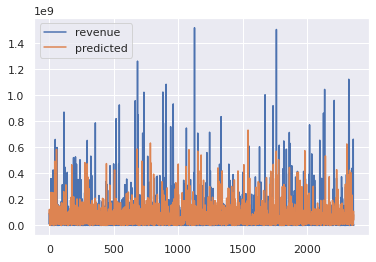

In [231]:
train_set[['revenue', 'predicted']][:len(X)].plot()

In [232]:
X = train_set[features][2500:]
y = train_set['revenue'][2500:]

#for feature in features:
#    MAX = train_set[feature].max()
#    MIN = train_set[feature].min()
#
#    X[feature] = (X[feature]-MIN)/(MAX-MIN)

X = X.fillna(0)


#X['budget'] = X['budget']*100

#for director in DIRECTORS:
#    X[director] = X[director]*10

train_set['predicted'][2500:] = model.predict(X)

<ipython-input-232-b77ab8b93eee>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['predicted'][2500:] = model.predict(X)


<AxesSubplot:>

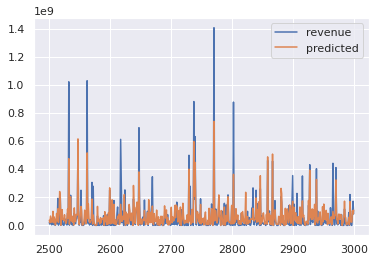

In [233]:
train_set[['revenue','predicted']][2500:].plot()

In [234]:
train_set['revenue'][2500:].corr(train_set['predicted'][2500:])

0.853293787315762

In [235]:
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y,train_set['predicted'][2500:]))

R2 score : 0.68


In [236]:
model.get_params()

{'copy_X': True,
 'fit_intercept': False,
 'n_jobs': None,
 'normalize': False,
 'positive': True}

In [237]:
train_set[['title', 'revenue', 'predicted']][2500:].sort_values('predicted', ascending=False).head()

,title,revenue,predicted
2770,Avengers: Age of Ultron,1405403694,7.392414e+08
2547,I Am Legend,585349010,6.150530e+08
2737,Spectre,880674609,5.964956e+08
2562,Finding Dory,1028570889,5.156152e+08
2866,National Treasure: Book of Secrets,457363168,5.071980e+08


In [80]:
test = test_set[features]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Columns: 1058 entries, Animation to Pусский
dtypes: float64(2), int64(1056)
memory usage: 35.5 MB


In [81]:
X = test_set[features]
for feature in features:
    MAX = test_set[feature].max()
    MIN = test_set[feature].min()
    X[feature] = (X[feature]-MIN)/(MAX-MIN)
    
X = X.fillna(0)


<ipython-input-81-6c66c963e9ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = (X[feature]-MIN)/(MAX-MIN)


In [82]:
test_set['revenue'] = model.predict(X)

In [83]:
test_set[['title', 'revenue']].sort_values('revenue', ascending=False).head(10)

,title,revenue
1269,Chicken Little,7.868249e+08
3212,The Rescuers Down Under,7.534430e+08
2420,Ouija,7.362481e+08
659,Lilo & Stitch,7.210529e+08
534,Who Framed Roger Rabbit,7.171819e+08
273,Mulan,7.160031e+08
1388,The Emperor's New Groove,7.072031e+08
966,Treasure Planet,7.043249e+08
1589,Captain America: Civil War,6.680868e+08
516,Thor: The Dark World,5.884128e+08


In [341]:
genres = input("Movie genre/s? ").split(',')
runtime = input('Runtime? (in minutes) ')
popularity = input('Popularity? (0-100) ')
belongs_to_collection = input('Belongs to collection? [y/n] ')
release_year = input('Release year? ')
release_month = input('Release month? ')
prod_companies = input('Production companies? ').split(',')
prod_countries = input('Production countries? ').split(',')
actors = input('Actors? ').split(',')
directors = input('Directors? ').split(',')
budget = input('Budget? ')
has_homepage = input('Has homepage? [y/n] ')
has_tagline = input('Has tagline? [y/n] ')
keywords = input("Keywords? ").split(',')
langs = input("Languages? ").split(',')

Movie genre/s?  Action,Adventure
Runtime? (in minutes)  110
Popularity? (0-100)  20
Belongs to collection? [y/n]  n
Release year?  2022
Release month?  9
Production companies?  Universal,Paramount Pictures
Production countries?  United States of America
Actors?  Dwayne Johnson,Emily Blunt,Sharon Stone,Robert De Niro
Directors?  Jake Kasdan
Budget?  100000000
Has homepage? [y/n]  y
Has tagline? [y/n]  y
Keywords?  adventure,mistery,nature,jungle,ancient
Languages?  English


In [342]:
belongs_to_collection = 1 if belongs_to_collection == 'y' else 0
has_homepage = 1 if has_homepage == 'y' else 0
has_tagline = 1 if has_tagline == 'y' else 0
release_quarter = int(int(release_month)/4)+1
n_genres = len(genres)
movie_to_predict = [1 if genre in genres else 0 for genre in GENRES]
movie_to_predict.extend([n_genres, runtime, popularity, belongs_to_collection, release_year, release_quarter, has_homepage, budget, has_tagline])
movie_to_predict.extend([1 if country in prod_countries else 0 for country in PROD_COUNTRIES])
movie_to_predict.extend([1 if company in prod_companies else 0 for company in PROD_COMPANIES])
movie_to_predict.extend([len(CAST.intersection(actors))])
movie_to_predict.extend([1 if any(DIRECTORS.intersection(directors)) else 0])
movie_to_predict.extend([1 if lang in langs else 0 for lang in LANGUAGES])
movie_to_predict.extend([1 if actor in actors else 0 for actor in CAST])
movie_to_predict.extend([1 if director in directors else 0 for director in DIRECTORS])
movie_to_predict.extend([1 if keyword in keywords else 0 for keyword in KEYWORDS])

features_corr = features[:]
features_corr.extend([actor for actor in CAST])
features_corr.extend([director for director in DIRECTORS])
features_corr.extend([keyword for keyword in KEYWORDS])

data = {}
c=0
for f in features_corr:
    data[f] = int(movie_to_predict[c])
    c += 1

movie2p_df = pd.DataFrame(data=data, index=range(1))
X = movie2p_df[:]
for feature in features:
    MAX = train_set[feature].max()
    MIN = train_set[feature].min()
    X[feature] = (movie2p_df[feature]-MIN)/(MAX-MIN)

In [343]:
movie2p_df['revenue'] = model.predict(X[features])
movie2p_df['revenue'][0]


20516137.2303059

In [311]:
add_columns(CAST,'cast')
add_columns(DIRECTORS, 'directors')
add_columns(KEYWORDS, 'Keywords')

In [332]:
X_train = train_set[features_corr][:]

for feature in features:
    MAX = train_set[feature].max()
    MIN = train_set[feature].min()

    X_train[feature] = (X_train[feature]-MIN)/(MAX-MIN)

X_train = X_train.fillna(0)

In [344]:
only_true_features = []
for f in features_corr:
    if movie2p_df[f].loc[0] != 0:
        only_true_features.extend([f])
movie2p_df.loc[0][only_true_features]

Adventure                           1.0
Action                              1.0
n_genres                            2.0
runtime                           110.0
popularity                         20.0
year                             2022.0
quarter                             3.0
homepage                            1.0
budget                      100000000.0
tagline                             1.0
United States of America            1.0
Paramount Pictures                  1.0
famous_actors                       3.0
has_famous_director                 1.0
English                             1.0
Dwayne Johnson                      1.0
Robert De Niro                      1.0
Sharon Stone                        1.0
Jake Kasdan                         1.0
jungle                              1.0
Name: 0, dtype: float64

In [345]:
correlations=[]
for c in range(len(X_train)):
    correlations.extend([X[only_true_features].loc[0].corr(X_train[only_true_features].loc[c])])
correlations = pd.Series(data=correlations,name="correlation")

In [346]:
correlations = correlations.sort_values(ascending=False)
correlations.head(3000)


2777    0.473942
2351    0.460793
2709    0.456506
2815    0.451100
2152    0.449419
          ...   
1899   -0.184497
2224   -0.188759
2747   -0.189748
684    -0.221862
2554   -0.251445
Name: correlation, Length: 3000, dtype: float64

In [347]:
train_set['title'].loc[correlations.index[0]]

'The Phantom'

In [348]:
train_set[only_true_features].loc[correlations.index[0]]


Adventure                   1.000000e+00
Action                      1.000000e+00
n_genres                    2.000000e+00
runtime                     1.000000e+02
popularity                  8.079541e+00
year                        1.996000e+03
quarter                     2.000000e+00
homepage                    0.000000e+00
budget                      4.500000e+07
tagline                     1.000000e+00
United States of America    1.000000e+00
Paramount Pictures          1.000000e+00
famous_actors               6.000000e+00
has_famous_director         1.000000e+00
English                     1.000000e+00
Dwayne Johnson              0.000000e+00
Robert De Niro              0.000000e+00
Sharon Stone                0.000000e+00
Jake Kasdan                 0.000000e+00
jungle                      1.000000e+00
Name: 2777, dtype: float64

In [349]:
def suggest_person(SET, category, already_in):
    person_to_add = None
    for i in range(len(correlations)):
        index = correlations.index[i]
        if train_set['revenue'].loc[index] > movie2p_df['revenue'].loc[0]:
            for person in train_set[category].loc[index]:
                if person in SET and not person in already_in:
                    person_to_add = person
                    return person_to_add


actor_to_add = suggest_person(CAST, 'cast', actors)


print("I suggest you this actor to have a higher revenue: ", suggest_person(CAST, 'cast', actors))

I suggest you this actor to have a higher revenue:  Harrison Ford


In [339]:
director_to_add = None if movie2p_df['has_famous_director'][0] == 1 else suggest_person(DIRECTORS, 'directors', directors)

if director_to_add != None:
    print("I suggest you this director to have a higher revenue: ", director_to_add)
else:
    print("You already have a good director for this movie")

I suggest you this director to have a higher revenue:  Takashi Miike


In [340]:
movie2p_df['famous_actors'] += 1
movie2p_df['has_famous_director'] = 1

X = movie2p_df[:]
for feature in features:
    MAX = train_set[feature].max()
    MIN = train_set[feature].min()
    X[feature] = (movie2p_df[feature]-MIN)/(MAX-MIN)
model.predict(X[features])

array([38020.68327609])

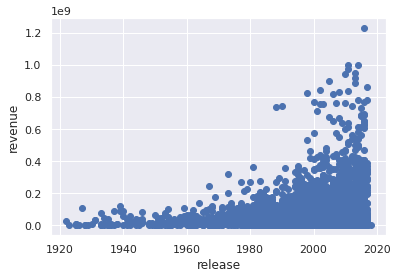

In [76]:
# Let's plot the data now
x = test_set['year']
#x = [len(test_set['crew'][i]) for i in range(len(test_set['crew']))]
y = test_set['revenue']

plt.scatter(x,y)
plt.xlabel("release")
plt.ylabel("revenue")
plt.show()

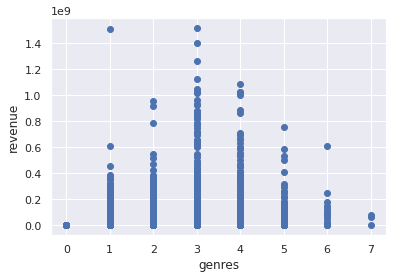

In [72]:
# Let's plot the data now
#x = train_set['Thriller']
x = [len(train_set['genres'][i]) for i in range(len(train_set['genres']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("genres")
plt.ylabel("revenue")
plt.show()

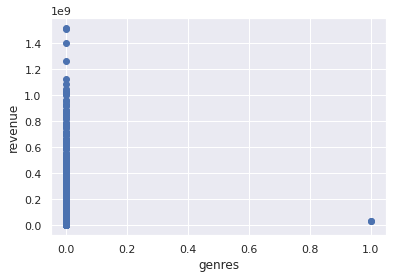

In [63]:
x = train_set['Tom Hanks']
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("genres")
plt.ylabel("revenue")
plt.show()

In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Columns: 1557 entries, Comedy to Nederlands
dtypes: float64(1557)
memory usage: 29.7 MB


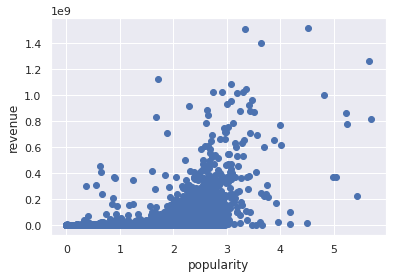

In [354]:
train_set['log_popularity'] = np.log1p(train_set['popularity'])
x = train_set['log_popularity']
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("popularity")
plt.ylabel("revenue")
plt.show()

In [181]:
common_countries

Index(['United States of America', 'United Kingdom', 'France', 'Germany',
       'Canada', 'India', 'Italy', 'Australia', 'Japan', 'Russia', 'Spain',
       'Hong Kong', 'China', 'Ireland', 'Belgium'],
      dtype='object')

In [321]:
for actors,film,r in zip(train_set['cast'],train_set['title'],train_set['revenue']):
    if ('Nick Thompson' in actors):
        print("C'è!!! " + film + f" ${r}")

C'è!!! Scarface $600000
C'è!!! Dances with Wolves $424208848


In [236]:
s = set()
s = s.union([2,4])
print(s)

{2, 4}


In [89]:
len(PROD_COMPANIES)

3695

In [163]:
features = [genre for genre in GENRES]
features.extend(['n_genres', 'runtime', 'popularity', 'belongs_to_collection', 'year', 'month','homepage', 'budget', 'tagline'])
features.extend([country for country in PROD_COUNTRIES])
features.extend([company for company in PROD_COMPANIES])
features.extend([actor for actor in CAST])
features.extend([keyword for keyword in KEYWORDS])
features.extend([lang for lang in LANGUAGES])
X = train_set[features][:2500]
y = [train_set['revenue'][c] for c in range(2500) if train_set['revenue'][c] <= upper_lim]

for feature in features:
    MAX = train_set[feature].max()
    MIN = train_set[feature].min()

    X[feature] = (X[feature]-MIN)/(MAX-MIN)

X = X.fillna(0)

for rev,ID in zip(train_set['revenue'][:2500], range(len(X))):
    if (rev > upper_lim):
        X = X.drop(ID)


#model = LinearRegression(fit_intercept=False, positive=True)
#model = Ridge(alpha=4)
model = Lasso(fit_intercept=False, alpha=1000)
model.fit(X, y)
train_set['predicted'] = [0 for x in train_set['revenue']]
train_set['predicted'][:len(X)] = model.predict(X)
print("linear regression train score R^2:", model.score(X, y))

linear regression train score R^2: 0.9565691527467035


<ipython-input-163-a39320d134f4>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['predicted'][:len(X)] = model.predict(X)


In [277]:
train_set[['Steven Spielberg', 'title']].head(15)

,Steven Spielberg,title
0,0,Hot Tub Time Machine 2
1,0,The Princess Diaries 2: Royal Engagement
2,0,Whiplash
3,0,Kahaani
4,0,Marine Boy
5,0,Pinocchio and the Emperor of the Night
6,0,The Possession
7,0,Control Room
8,0,Muppet Treasure Island
9,0,A Mighty Wind


In [241]:
movie2p_df[only_true_features].loc[0]

Adventure                           1
Action                              1
n_genres                            2
runtime                           140
popularity                         90
belongs_to_collection               1
year                             2021
quarter                             3
homepage                            1
budget                      300000000
tagline                             1
United States of America            1
Paramount Pictures                  1
Marvel Studios                      1
famous_actors                       5
English                             1
Name: 0, dtype: int64

In [211]:
len(CAST)

4021

In [350]:
train_set['popularity'].max()

294.337037